In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
dataset = pd.read_csv('synthetic_dataset_enhanced.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [58]:
dataset

,Weather_condition,Service,Price_change_factor
0,Extreme,AC Repair Service,0.137183
1,Fine,Men/kids haircut,-50.619914
2,Fine,Hair colour,-63.880014
3,Extreme,Water Purifier Repair,18.432801
4,Fine,Kitchen cleaning,16.655649
...,...,...,...
995,Extreme,Refrigerator Repair,15.985392
996,Extreme,Water Purifier Repair,-6.693268
997,Fine,Hair colour,16.571008
998,Moderate,Electrician,56.414909


In [59]:
X

array([['Extreme', 'AC Repair Service'],
       ['Fine', 'Men/kids haircut'],
       ['Fine', 'Hair colour'],
       ...,
       ['Fine', 'Hair colour'],
       ['Moderate', 'Electrician'],
       ['Fine', 'Home painting']], dtype=object)

In [60]:
categorical_columns = [0,1]

In [61]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', sparse=False)

In [62]:
encoded_categorical_data = encoder.fit_transform(X[:, categorical_columns])

# Handle numerical columns
numerical_columns = [col for col in range(X.shape[1]) if col not in categorical_columns]
numerical_data = X[:, numerical_columns].astype(float)

# Concatenate the encoded data with the numerical column(s)
encoded_data = np.concatenate((encoded_categorical_data, numerical_data), axis=1)
encoded_data

C:\Users\kvbhk\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
scalery = StandardScaler()
y_train = scalery.fit_transform(y_train.reshape(-1, 1))
y_train

array([[ 0.99515627],
       [ 1.02949977],
       [ 0.34004384],
       ...,
       [-0.49761442],
       [-1.57187921],
       [-0.77430184]])

In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\kvbhk\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
y_pred = scalery.inverse_transform(regressor.predict(X_test).reshape(-1, 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[388.31 193.98]
 [399.55 168.83]
 [425.13 461.31]
 ...
 [364.93 393.68]
 [373.79 432.27]
 [294.7  366.27]]


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.12015889520261314

In [28]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [64]:
from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
y_pred = classifier.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test contains the true target values and y_pred contains the predicted target values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 15.876192613526038
Mean Squared Error: 387.48306031752355
Root Mean Squared Error: 19.684589411961927


In [68]:
from sklearn.metrics import r2_score

# Assuming y_true contains the true values and y_pred contains the predicted values
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.015712590622823264


In [69]:
y_pred

array([ 2.14, -2.67, -2.71,  0.35,  1.75,  0.35, -4.95,  3.2 , -1.06,
        1.75, -4.95,  3.2 ,  2.14, -0.5 ,  0.35, -4.95, -2.3 , -1.88,
       -1.24, -2.67, -4.95, -1.95,  1.75,  0.29, -2.82, -1.95, -2.3 ,
        6.17, -2.67, -2.82,  6.17, -0.5 , -1.88,  0.35, -2.82,  1.75,
       -1.31,  0.35, -2.71,  3.2 ,  1.75, -2.3 ,  0.29, -1.24,  0.29,
       -2.82, -4.01, -1.31, -1.06, -2.67,  5.52, -1.24, -1.24, -1.06,
        3.2 ,  2.14, -4.95, -2.67, -2.82, -1.88, -1.95,  0.29,  5.52,
       -1.88, -4.01,  2.14,  2.14, -4.01,  3.2 , -1.88,  3.2 ,  6.17,
       -2.67,  0.29, -4.95, -1.06, -2.82,  2.14, -1.88,  2.07, -1.24,
        0.29,  0.29,  5.52, -1.95, -4.01, -4.95,  0.29,  0.29, -2.67,
       -0.5 ,  0.29,  2.07, -2.67, -2.3 ,  0.29, -2.3 , -2.3 , -4.95,
       -1.06, -2.3 ,  3.2 ,  2.14, -2.82, -1.06, -1.95,  2.07, -1.24,
       -4.01,  0.29,  1.75,  6.17, -1.95, -2.71, -1.88,  3.2 , -0.5 ,
       -2.82,  0.29, -1.88, -1.95, -1.95,  1.75, -2.82, -1.88, -1.31,
        2.07,  5.52,

In [70]:
y_test

array([ 14.92, -28.65, -20.37,  -6.82,  -9.94,  44.76,  -1.98, -24.02,
       -15.4 , -24.6 , -20.21,   0.41, -24.94,  18.52,  -7.4 ,  26.68,
       -30.5 ,   2.74, -16.59,  -5.24,   7.26,  17.31,   6.21,  40.23,
        -9.02,  -8.29,  16.62,   5.27, -35.17, -50.62,  -8.04,  -6.39,
        49.43, -23.64, -33.71,  23.95,  -5.76,  -2.78,  15.42, -12.28,
        -7.3 ,  -6.69,   0.62,   2.82, -13.86,  -5.34,  -4.89, -11.23,
        10.66,  -5.79,  -6.01,   8.11,   0.77,   2.46, -27.54,  23.73,
       -23.76, -27.76,   0.11, -22.17,  16.63,  -9.6 ,   7.54,  -6.49,
         4.28,  -4.95,  21.52,  11.66, -15.43, -26.54,  -9.56,  32.16,
         5.99,  -7.86,  -9.92,   0.26,  -0.33,  25.86,  34.74, -18.09,
        -4.83,  22.78,   7.48, -15.12,  43.15,   1.75,  29.9 ,  12.42,
        -0.6 ,   9.81,   2.02,  21.96,  42.68, -49.22, -27.63,   8.55,
       -13.54, -18.18, -30.07,  -2.42, -20.82,  -1.98, -19.4 , -18.02,
         6.06, -24.27,   4.1 ,   0.07,   8.4 , -10.57,  -2.16, -17.25,
      

In [71]:
import tensorflow as tf

# Assuming X_train and y_train are your training features and target variable
# Define the architecture of your neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error on test data:", loss)


Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 392.0573 - val_loss: 456.0342
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 391.1533 - val_loss: 456.6225
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 390.5045 - val_loss: 457.0961
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 389.9741 - val_loss: 457.8697
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 389.4586 - val_loss: 458.6005
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 388.9105 - val_loss: 459.5072
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 388.5164 - val_loss: 460.3588
Epoch 8/50
20/20 [==============================] - 0s 3ms/step - loss: 387.9209 - val_loss: 460.8969
Epoch 9/50
20/20 [==============================] - 0s 3ms/step - loss: 387.3060 - val_loss: 461.8819
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 386.7915

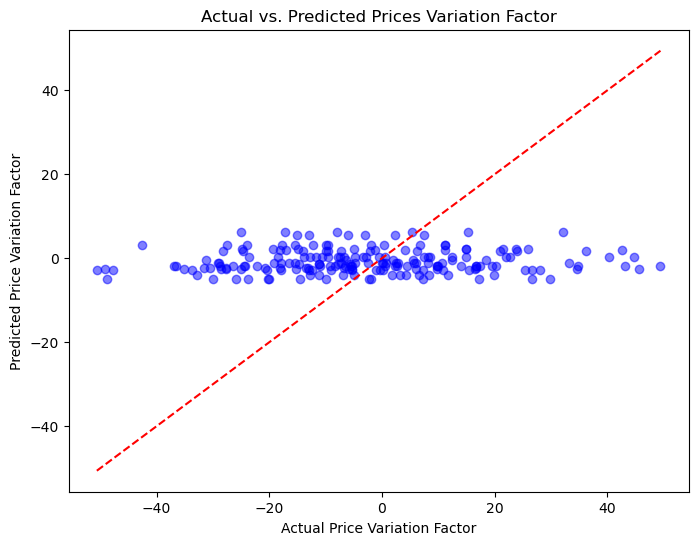

In [73]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred contain the actual and predicted target values, respectively

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price Variation Factor')
plt.ylabel('Predicted Price Variation Factor')
plt.title('Actual vs. Predicted Prices Variation Factor')
plt.show()


In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred contain the actual and predicted target values, respectively

# Sort the actual values and corresponding predicted values for plotting the fitting curve
sorted_indices = np.argsort(y_test)
sorted_y_test = y_test.iloc[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

plt.figure(figsize=(8, 6))
plt.plot(sorted_y_test, sorted_y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices with Fitting Curve')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("newData.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Separate features and target variable
X = data[['Weather', 'City', 'Subservice', 'Service']]
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical and numerical features
categorical_features = ['Weather', 'City', 'Subservice', 'Service']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical features
numerical_features = []
numerical_transformer = StandardScaler()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that preprocesses the data and trains the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline to training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 133.60800057364304
